In [1]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Основы работы с TensorFlow

## Установка

In [2]:
!uname -a

Linux bruteforce 5.2.0-kali2-amd64 #1 SMP Debian 5.2.9-2kali1 (2019-08-22) x86_64 GNU/Linux


!pip install tensorflow

!pip install tensorflow-gpu

### Импорт библиотеки

In [3]:
import tensorflow as tf
print(tf.__version__)

2.6.0


## Создание переменных и выполнение операций.

In [4]:
tf.compat.v1.disable_eager_execution()

In [5]:
a = tf.Variable(1.)
b = tf.Variable(2.)
op = a+b

s = tf.compat.v1.Session()
s.run(tf.compat.v1.global_variables_initializer())
s.run(op)
s.close()

## Решение задач оптимизации (поиск минимума).

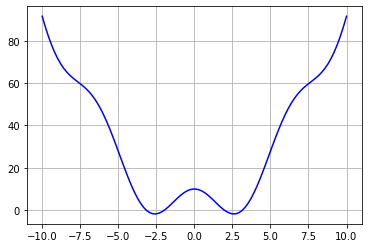

In [6]:
xs = np.linspace(-10, 10, 100)
ys = np.power(xs, 2) + 10*np.cos(xs)

plt.plot(xs, ys, c='b')
plt.grid(True)
plt.show()

In [7]:
t_xs = tf.Variable([10.])
t_ys = tf.pow(t_xs, 2) + 10*tf.cos(t_xs)

In [8]:
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.001)

In [9]:
step = optimizer.minimize(t_ys)

In [10]:
x_r, y_r = [], []
s = tf.compat.v1.Session()
s.run(tf.compat.v1.global_variables_initializer())

for i in range(1000):
  _, x, y = s.run([step, t_xs, t_ys])
  if i%100==0:
    print(x, y)
    x_r.append(x)
    y_r.append(y)

s.close()

[10.] [91.60928]
[8.47005] [65.96344]
[7.797102] [61.36329]
[7.225294] [58.085712]
[6.3769693] [50.62179]
[4.7133317] [22.224924]
[3.2967143] [0.9883976]
[2.8198197] [-1.5353789]
[2.6708434] [-1.7788825]
[2.621447] [-1.8054833]


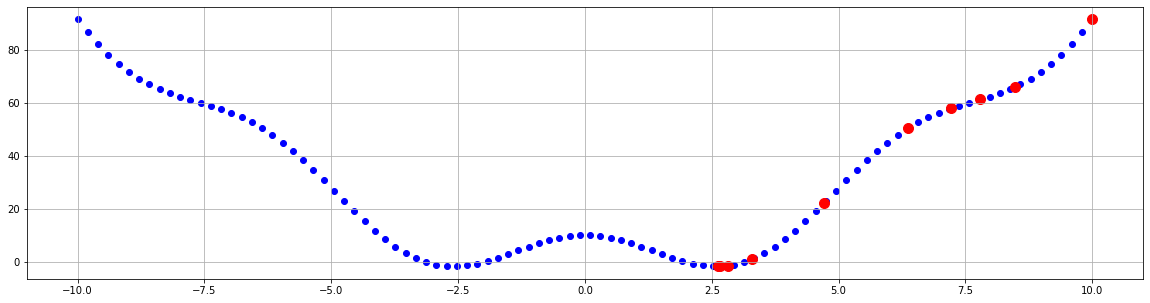

In [11]:
plt.figure(figsize=(20,5))
plt.scatter(xs, ys, c='b')
plt.scatter(x_r, y_r, c='r', s=100)
plt.grid(True)
plt.show()

На рисунке показаны промежуточные значения поиска минимума.

## Построение линейной регрессии.

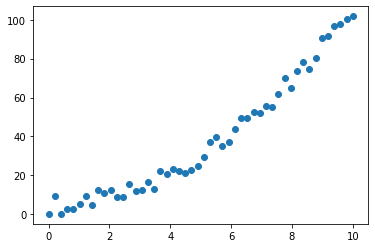

In [12]:
xs = np.linspace(0, 10, 50)
ys = xs**2 + np.random.random(50)*10
plt.scatter(xs, ys)
plt.show()

In [13]:
X = tf.compat.v1.placeholder(dtype=tf.float32)
Y = tf.compat.v1.placeholder(dtype=tf.float32)

In [14]:
X

<tf.Tensor 'Placeholder:0' shape=<unknown> dtype=float32>

In [15]:
def model(X,w):
    return tf.multiply(X,w)

In [16]:
w = tf.Variable([0.], dtype=tf.float32)

In [17]:
y_model = model(X,w)

In [18]:
loss = tf.sqrt(tf.reduce_sum(tf.pow(tf.subtract(y_model, Y), 2)))

In [19]:
optimizer = tf.compat.v1.train.RMSPropOptimizer(0.01)
step = optimizer.minimize(loss)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [20]:
s = tf.compat.v1.Session()
s.run(tf.compat.v1.global_variables_initializer())

for epoch in range(1000):
    s.run(step, feed_dict={X:xs, Y:ys})

result = s.run(w)

print(result)
s.close()

[8.354576]


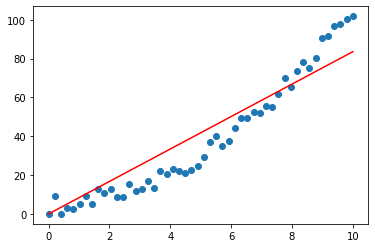

In [21]:
plt.scatter(xs, ys)
plt.plot(xs, xs*result[0], c='r')
plt.show()

## Простая нейронная сеть

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [23]:
model = Sequential()
model.add(Input(shape=64))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 4,810
Trainable params: 4,810
Non-trainable params: 0
_________________________________________________________________


In [25]:
data = load_digits()
X = data.data
y = tf.keras.utils.to_categorical(data.target)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1257, 64), (1257, 10), (540, 64), (540, 10))

In [27]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=2)

Train on 1257 samples, validate on 540 samples
Epoch 1/10
1257/1257 - 0s - loss: 2.1240 - accuracy: 0.3381 - val_loss: 1.7383 - val_accuracy: 0.5889
Epoch 2/10
1257/1257 - 0s - loss: 1.4493 - accuracy: 0.7367 - val_loss: 1.2631 - val_accuracy: 0.7852
Epoch 3/10
1257/1257 - 0s - loss: 1.0555 - accuracy: 0.8481 - val_loss: 0.9735 - val_accuracy: 0.8481
Epoch 4/10
1257/1257 - 0s - loss: 0.8081 - accuracy: 0.9045 - val_loss: 0.7887 - val_accuracy: 0.8667
Epoch 5/10
1257/1257 - 0s - loss: 0.6427 - accuracy: 0.9196 - val_loss: 0.6403 - val_accuracy: 0.9074
Epoch 6/10
1257/1257 - 0s - loss: 0.5165 - accuracy: 0.9372 - val_loss: 0.5379 - val_accuracy: 0.9111
Epoch 7/10
1257/1257 - 0s - loss: 0.4244 - accuracy: 0.9475 - val_loss: 0.4625 - val_accuracy: 0.9167
Epoch 8/10
1257/1257 - 0s - loss: 0.3572 - accuracy: 0.9539 - val_loss: 0.3987 - val_accuracy: 0.9296
Epoch 9/10
1257/1257 - 0s - loss: 0.3050 - accuracy: 0.9626 - val_loss: 0.3584 - val_accuracy: 0.9370
Epoch 10/10
1257/1257 - 0s - loss: 

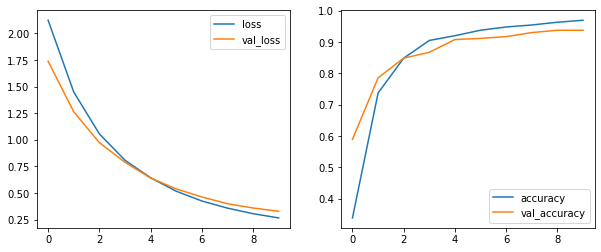

In [28]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

plt.subplot(122)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()

plt.show()

In [29]:
model.evaluate(X_test, y_test)

[0.32776892251438566, 0.93703705]